roll no. : 18bce084
name     : Kaushal B. Jani

In [17]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


**multiple linear regression with Gradient Decent Method**

In [41]:
# this module is for  seperating testing and training data
X,Y=load_boston(return_X_y=True)
temp1=X[0:400,:]
temp2=np.ones((temp1.shape[0],1))
xtrain=np.append(temp2,temp1,axis=1)
ytrain=Y[0:400]
ytrain=ytrain.reshape((400,1))
xtest=np.append(np.ones((X[400:500,:].shape[0],1)),X[400:500,:],axis=1)
ytest=Y[400:500]
ytest=ytest.reshape((100,1))

scal=StandardScaler()
scal.fit(xtrain)
xtrain=scal.transform(xtrain)
scal.fit(xtest)
xtest=scal.transform(xtest)


In [42]:
# this module is for learing   multivairate linear  regression model 

theta = np.zeros((14,1),dtype=float)
temp=theta.copy()
ytrain=ytrain.reshape((400,1))
lr=0.0001 # learning rate
temp=xtrain@theta - ytrain
for j in range(1,1000):
  temp=xtrain@theta - ytrain
  for i in range(0,14):
    y=xtrain[:,i]
    y=y.reshape((400,1))
    temp1 = temp * y
    x=(temp1.sum())/xtrain.shape[0]
    theta[i]=theta[i]-(lr * x)



In [43]:
ypred=xtest @ theta
print("mean absolute error ",mean_absolute_error(ytest,ypred))
print("mean squared error  ",mean_squared_error(ytest,ypred))
print(theta)# showing the actual parameter of the  regression model

mean absolute error  15.501999999999963
mean squared error   259.39223845088895
[[ 0.        ]
 [-0.18675156]
 [ 0.21780977]
 [-0.25859133]
 [ 0.12619024]
 [-0.19948095]
 [ 0.60782201]
 [-0.18168749]
 [ 0.03480151]
 [-0.11087706]
 [-0.21023963]
 [-0.34351112]
 [ 0.10389375]
 [-0.54920477]]


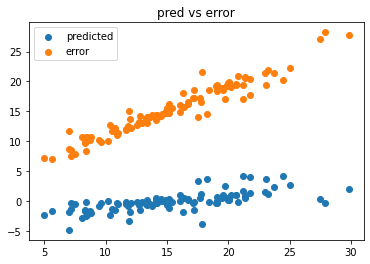

In [35]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
plt.scatter(ytest,ypred,label="predicted")
plt.scatter(ytest,ytest-ypred,label="error")
plt.title("pred vs error")
plt.legend()
plt.show()





[[ 0.        ]
 [-1.1436985 ]
 [ 1.12189743]
 [ 0.35909117]
 [ 0.48498192]
 [-1.70616032]
 [ 3.58170511]
 [ 0.07553684]
 [-2.81564362]
 [ 3.05178355]
 [-1.97490878]
 [-1.79372747]
 [-0.05251438]
 [-3.50239008]] 
 with lr=0.00001 and epoch = 10^5

**multiple linear regression with normal equation method**

In [44]:
theta1=np.zeros((14,1))
theta1=np.linalg.pinv(xtrain.T @ xtrain) @ xtrain.T @ ytrain

ypred=xtest @ theta1

print(theta1)#showing the parameter of the model
print("mean absolute error ",mean_absolute_error(ytest,ypred))
print("mean squared error  ",mean_squared_error(ytest,ypred))


[[ 0.        ]
 [-1.14370921]
 [ 1.12191092]
 [ 0.35913222]
 [ 0.48497247]
 [-1.7061696 ]
 [ 3.58169796]
 [ 0.07554815]
 [-2.8156326 ]
 [ 3.05189603]
 [-1.97502535]
 [-1.7937352 ]
 [-0.05252128]
 [-3.50239563]]
mean absolute error  15.5019999999998
mean squared error   268.7596056900782


In [45]:
temp1=X[0:400,:]
temp2=np.ones((temp1.shape[0],1))
xtrain=np.append(temp2,temp1,axis=1)
ytrain=Y[0:400]
y=ytrain
xtest=np.append(np.ones((X[400:500,:].shape[0],1)),X[400:500,:],axis=1)
ytest=Y[400:500]

theta1=np.zeros((14,1))
theta1=np.linalg.pinv(xtrain.T @ xtrain) @ xtrain.T @ ytrain

ypred=xtest @ theta1

print(theta1)#showing the parameter of the model
print("mean absolute error ",mean_absolute_error(ytest,ypred))
print("mean squared error  ",mean_squared_error(ytest,ypred))



[ 2.86725996e+01 -1.91246374e-01  4.42289967e-02  5.52207977e-02
  1.71631351e+00 -1.49957220e+01  4.88773025e+00  2.60921031e-03
 -1.29480799e+00  4.84787214e-01 -1.54006673e-02 -8.08795026e-01
 -1.29230427e-03 -5.17953791e-01]
mean absolute error  5.2028163789542115
mean squared error   38.63887478858032


here in normal equation method if we scale data(in same range) like first cell than accuracy is not good but if we apply data without scaling accuracy is good which is far better than gradient decent method because in gd we have to tune hyper parameters. 